In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm

# Dates de début et de fin de chaque jour de 2017
start_date = datetime(2017, 1, 1)
end_date = datetime(2023, 1, 3)
date_range = [start_date + timedelta(days=x) for x in range((end_date-start_date).days)]

# Liste de requêtes
queries = []
for i in range(len(date_range)-1):
    query = 'Pokemon OR Pokémon OR #Pokemon OR #PokemonSwordShield OR #PokemonGo since:{} until:{} filter:twimg min_faves:1000'
    query = query.format(date_range[i].strftime('%Y-%m-%d'), date_range[i+1].strftime('%Y-%m-%d'))
    queries.append(query)

# Scraper les tweets pour chaque requête et trier par le nombre de likes
tweets = []
for query in tqdm(queries):
    tweet_list = []
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        tweet_list.append([tweet.date, tweet.user.username, tweet.user.location, tweet.rawContent, 
                           tweet.replyCount, tweet.likeCount, tweet.retweetCount, tweet.user.followersCount, 
                           tweet.user.friendsCount, tweet.hashtags, tweet.lang, tweet.sourceLabel, 
                           tweet.links, tweet.mentionedUsers])
    tweet_list.sort(key=lambda x: x[3], reverse=True)  # Tri des tweets par le nombre de likes décroissant
    tweets.extend(tweet_list[:50])  # Ajout des 50 premiers tweets de la liste triée

# Créer un DataFrame à partir des tweets récupérés
df = pd.DataFrame(tweets, columns=['Date', 'Username', 'Location', 'Text', 'Reply', 'Like', 
                                   'Retweet', 'User Followers count', 'User Following count', 
                                   'Hashtags', 'Lang', 'sourceLabel', 'Links', 'Mentioned Users'])

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('top_tweets_2017_2022_pokemon.csv')

# Afficher les 5 premières lignes du DataFrame
df


100%|███████████████████████████████████████| 2192/2192 [50:06<00:00,  1.37s/it]


,Date,Username,Location,Text,Reply,Like,Retweet,User Followers count,User Following count,Hashtags,Lang,sourceLabel,Links,Mentioned Users
0,2017-01-01 06:40:37+00:00,coughdrops,,[SPOILERS] Pokemon sun/moon end game\nHappy holidays everyone! https://t.co/7eSSMO2Gl4,23,3065,1545,29635,376,None,en,TweetDeck,None,None
1,2017-01-01 16:01:27+00:00,Pokemon,Paldea,"Happy New Year! What are your #Pokemon resolutions this year, Trainers? https://t.co/WKzWUbEwQI",391,6395,1931,7731551,54,[Pokemon],en,Twitter Web Client,None,None
2,2017-01-02 15:59:07+00:00,Pokemon,Paldea,"Zzz...just five more minutes, please… #PokemonCenter https://t.co/jhIaWC95RJ https://t.co/QplDzbfnYX",61,4539,1063,7731551,54,[PokemonCenter],en,Twitter Web Client,"[TextLink(text='bit.ly/2hJ4rzB', url='http://bit.ly/2hJ4rzB', tcourl='https://t.co/jhIaWC95RJ', indices=(53, 76))]",None
3,2017-01-05 19:31:12+00:00,Pokemon,Paldea,It's time to grab your cameras again for a photo safari in Pokémon Snap! Now available on Nintendo eShop: https://t.co/4s5rWZGB8r https://t.co/kWtSZN6rZm,149,3680,1241,7731551,54,None,en,Twitter Web Client,"[TextLink(text='bit.ly/2h3Hvr6', url='http://bit.ly/2h3Hvr6', tcourl='https://t.co/4s5rWZGB8r', indices=(106, 129))]",None
4,2017-01-06 09:30:04+00:00,Pokemon_cojp,東京都,ポケモンファンのみんなへの、新年のスペシャルアイテムが登場！ ゲームフリークの年賀状イラストのクリアファイルが、1月14日（土）、ポケモンセンターで発売！ #ポケモンセンター https://t.co/Gfdysr7KUf,11,6144,3501,2136413,20,[ポケモンセンター],ja,pokemon_co_jp,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18987,2023-01-01 23:00:04+00:00,mecchaJP,Japon,Pokémon - Sinistea Counterfeit Form Cup &amp; Polteageist Counterfeit Form TeaCup - Very Limited Quantity!\n🛑https://t.co/PzRMThUNQP\n#Sinistea #Polteageist https://t.co/gAbTaRVNrW,25,4539,521,61265,0,"[Sinistea, Polteageist]",de,Buffer,"[TextLink(text='buff.ly/3WwWspU', url='https://buff.ly/3WwWspU', tcourl='https://t.co/PzRMThUNQP', indices=(108, 131))]",None
18988,2023-01-01 13:46:59+00:00,PokeliYT,Coumarine City,One of the greatest things that ever happen in a Pokémon Games. Period. https://t.co/Vh6aiiF023,76,12975,694,41631,176,None,en,Twitter Web App,None,None
18989,2023-01-01 21:03:29+00:00,zytomega,,"ONE THOUSAND YEARS AGO @Lockstin ASKED ""WHAT IF EEVEE WAS A LIZARD"" AND I FINALLY HAVE MY ANSWER\n\nMeet Mugini, the Mutation Pokémon! https://t.co/oY7eKYa460",460,59132,9490,3958,159,None,en,Twitter Web App,None,[https://twitter.com/Lockstin]
18990,2023-01-01 15:36:53+00:00,Redsfusion,Monte Plateado,"Me he comprado un calendario de Pokémon para este año. Si me decís vuestro cumpleaños, os paso foto del Pokémon que os toca el día de vuestro cumpleaños 🎁✨️👀 https://t.co/s9B5n9aCUA",5900,7749,407,36456,238,None,es,Twitter for Android,None,None


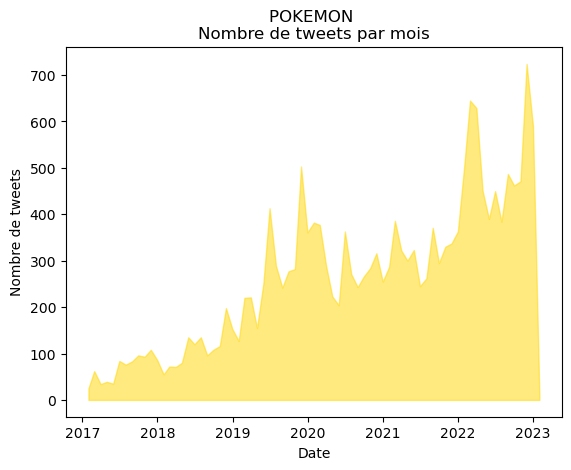

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates


# convertir la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# grouper les tweets par jour et compter le nombre de tweets par jour
daily_tweet_count = df.groupby(pd.Grouper(key='Date', freq='M')).size()

# créer le graphique
fig, ax = plt.subplots()
ax.fill_between(daily_tweet_count.index, daily_tweet_count.values, color= 'gold', alpha=0.5)

# formater l'axe x pour afficher les dates au format 'AAAA-MM-JJ'
date_format = mpl_dates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)


# ajouter des labels et un titre
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de tweets')
ax.set_title('POKEMON \nNombre de tweets par mois')

# afficher le graphique
plt.show()
